STEP 1: Import Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

STEP 2: Load MNIST Dataset

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (60000, 28, 28)
Testing samples: (10000, 28, 28)


STEP 3: EDA – Visualizing Sample Images

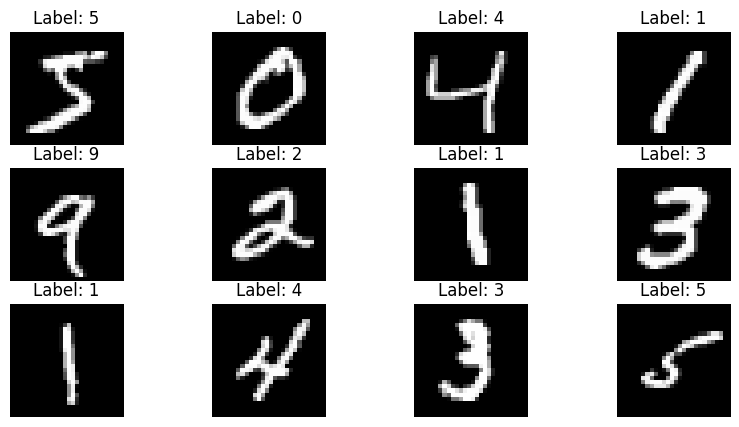

In [17]:
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

STEP 4: Preprocessing Data

In [18]:
# reshape (60000, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

In [19]:
# normalize pixel values
X_train = X_train / 255.0
X_test  = X_test / 255.0

STEP 5: Build CNN Model (LeNet-style)

In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

STEP 6: Compile the Model

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

STEP 7: Train the Model

In [33]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    verbose=2
   )

Epoch 1/10
422/422 - 37s - 88ms/step - accuracy: 0.9979 - loss: 0.0061 - val_accuracy: 0.9928 - val_loss: 0.0513
Epoch 2/10
422/422 - 40s - 96ms/step - accuracy: 0.9981 - loss: 0.0054 - val_accuracy: 0.9918 - val_loss: 0.0514
Epoch 3/10
422/422 - 36s - 85ms/step - accuracy: 0.9975 - loss: 0.0073 - val_accuracy: 0.9927 - val_loss: 0.0476
Epoch 4/10
422/422 - 51s - 121ms/step - accuracy: 0.9982 - loss: 0.0054 - val_accuracy: 0.9922 - val_loss: 0.0539
Epoch 5/10
422/422 - 72s - 171ms/step - accuracy: 0.9980 - loss: 0.0054 - val_accuracy: 0.9908 - val_loss: 0.0558
Epoch 6/10
422/422 - 50s - 118ms/step - accuracy: 0.9980 - loss: 0.0058 - val_accuracy: 0.9918 - val_loss: 0.0478
Epoch 7/10
422/422 - 74s - 175ms/step - accuracy: 0.9981 - loss: 0.0053 - val_accuracy: 0.9907 - val_loss: 0.0572
Epoch 8/10
422/422 - 41s - 96ms/step - accuracy: 0.9978 - loss: 0.0060 - val_accuracy: 0.9928 - val_loss: 0.0471
Epoch 9/10
422/422 - 37s - 87ms/step - accuracy: 0.9982 - loss: 0.0048 - val_accuracy: 0.992

STEP 8: Plot Accuracy & Loss Curves

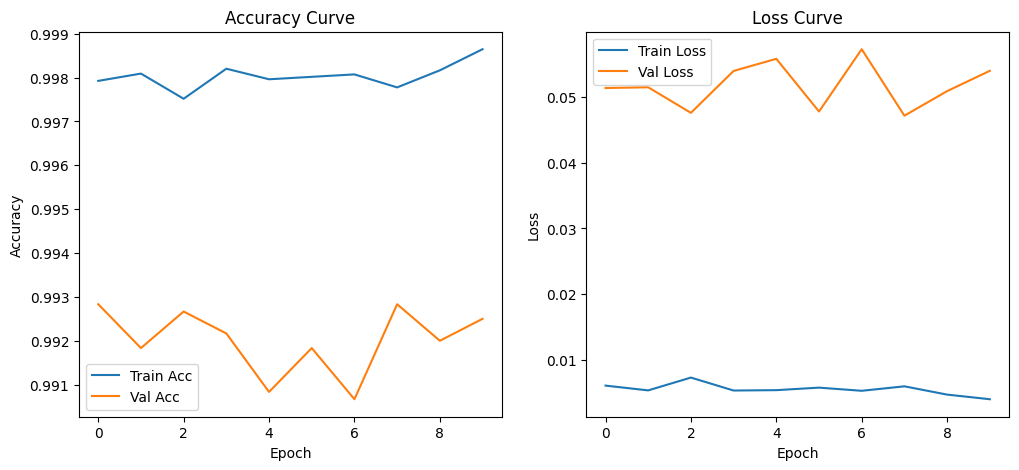

In [35]:
plt.figure(figsize=(12,5))

# accuracy curve
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# loss curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


STEP 9: Evaluate Model on Test Data

In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", round(test_acc*100, 2), "%")

Test Accuracy: 99.28 %


STEP 10: Confusion Matrix & Classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


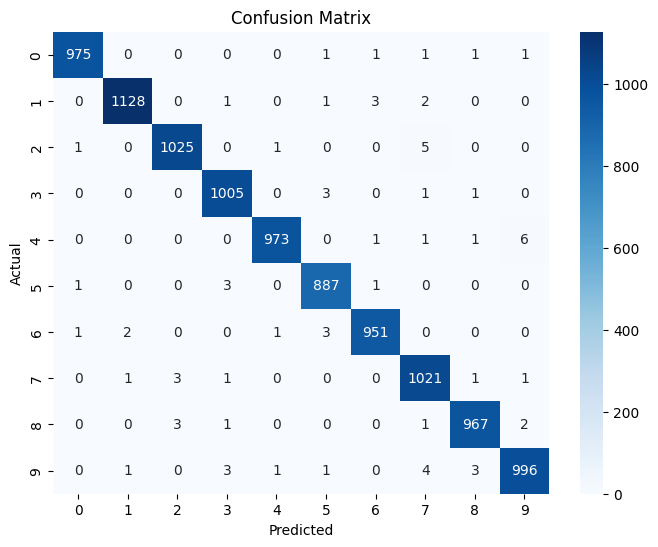


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [37]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

STEP 11: Predict on New Samples

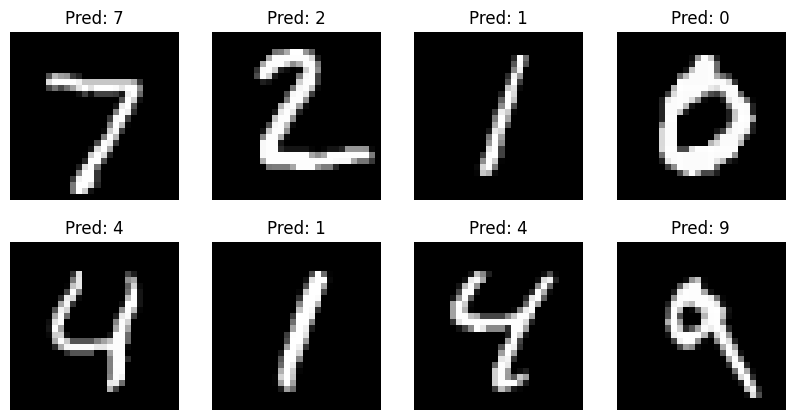

In [38]:
plt.figure(figsize=(10,5))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}")
    plt.axis("off")
plt.show()